# 공용처리

In [1]:
## Retail_dataset.xlsx
import sklearn as sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

In [2]:
import platform

def set_matplotlib_font():
    system = platform.system()

    if system == "Windows":
        plt.rc('font', family='Malgun Gothic')
    elif system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Linux":
        plt.rc('font', family='NanumGothic')
    else:
        print("Unknown system. Please set font manually.")

    plt.rcParams['axes.unicode_minus'] = False

# 폰트 설정 함수 호출
set_matplotlib_font()

# 이후 평소대로 matplotlib 사용

In [3]:
pd.describe_option()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller than the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.date_dayfirst : boolean
    When True, prints an

- 컬럼 추가 우선, 컬럼 삭제는 merge 후 최종 단계에!
- 

# 데이터 불러오기

In [4]:
# retail_dataset = pd.read_excel("C:/Git/심화프로젝트/dataset/Retail_dataset.xlsx", sheet_name=None)

In [5]:
# !kaggle datasets download -d quangvinhhuynh/marketing-and-retail-analyst-e-comerce
# import shutil
# filename = 'marketing-and-retail-analyst-e-comerce.zip' # 압축 해제할 파일 이름
# extrac_dir = 'dataset' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태
# shutil.unpack_archive(filename, extrac_dir, archive_format)
# import os
# # 파일들이 있는 폴더명으로 폴더내 파일 목록 확인
# os.listdir('dataset/') 
customers_df= pd.read_csv('dataset/customers.csv')
orders_df= pd.read_csv('dataset/orders.csv')
order_items_df= pd.read_csv('dataset/order_items.csv')
payments_df= pd.read_csv('dataset/payments.csv')
products_df= pd.read_csv('dataset/products.csv')

In [6]:
# order_df = retail_dataset['orders']
# order_items_df = retail_dataset['order_items']
# customers_df = retail_dataset['customers']
# payments_df = retail_dataset['payments']
# products_df = retail_dataset['products']

# 데이터 전처리

## ID 형 변환 (int -> str)

### order_items_df

In [7]:
order_items_df['order_item_id'] = order_items_df['order_item_id'].astype(str)

## product_df 결측치 처리

In [8]:
#제품 크기에 대한 정보가 없는 레코드가 2개 -> 삭제 처리
products_df= products_df[products_df['product_category_name'].notnull()]
products_df= products_df[products_df['product_length_cm'].notnull()]

## product_volume 추가

In [9]:
products_df['product_volume'] = products_df['product_length_cm'] *  products_df['product_height_cm'] *  products_df['product_width_cm'] 

# 데이터 병합 진행

In [10]:
retail_df_merged = pd.merge(orders_df, order_items_df, on='order_id', how='left')
retail_df_merged = pd.merge(retail_df_merged, payments_df, on='order_id', how='left')
retail_df_merged = pd.merge(retail_df_merged, customers_df, on='customer_id', how='right')
retail_df_merged = pd.merge(retail_df_merged, products_df, on='product_id', how='right')

In [11]:
retail_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127097 entries, 0 to 127096
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       127097 non-null  object 
 1   customer_id                    127097 non-null  object 
 2   order_status                   127097 non-null  object 
 3   order_purchase_timestamp       127097 non-null  object 
 4   order_approved_at              127081 non-null  object 
 5   order_delivered_timestamp      124354 non-null  object 
 6   order_estimated_delivery_date  127097 non-null  object 
 7   order_item_id                  127097 non-null  object 
 8   product_id                     127097 non-null  object 
 9   seller_id                      127097 non-null  object 
 10  price                          127097 non-null  float64
 11  shipping_charges               127097 non-null  float64
 12  payment_sequential            

# 불필요한 컬럼 삭제

In [12]:
# delivered 만
retail_df_merged = retail_df_merged[retail_df_merged['order_status']=='delivered']
retail_df_merged = retail_df_merged[retail_df_merged['order_delivered_timestamp'].notnull()]
retail_df_merged = retail_df_merged[retail_df_merged['order_approved_at'].notnull()]

# 컬럼 삭제
retail_df_merged= retail_df_merged.drop(labels= 'customer_zip_code_prefix', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'customer_city', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'order_estimated_delivery_date', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'order_delivered_timestamp', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_width_cm', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_height_cm', axis= 1)
retail_df_merged= retail_df_merged.drop(labels= 'product_length_cm', axis= 1)


## order - purchased_month

<Axes: xlabel='count', ylabel='payment_monthly'>

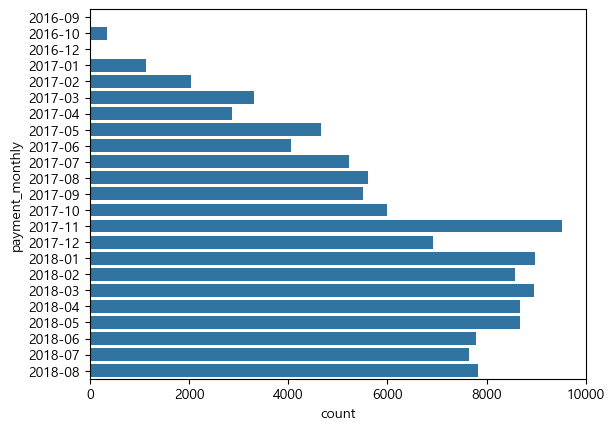

In [13]:
retail_df_merged['order_purchase_timestamp']= pd.to_datetime(retail_df_merged['order_purchase_timestamp'])
retail_df_merged['order_purchase_timestamp'].dt.strftime('%Y-%m')
retail_df_merged['payment_monthly']= retail_df_merged['order_purchase_timestamp'].dt.strftime('%Y-%m')
retail_df_merged['payment_monthly']= pd.to_datetime(retail_df_merged['payment_monthly'])
retail_df_merged['payment_monthly']= retail_df_merged['order_purchase_timestamp'].dt.to_period('M')

sns.countplot(data= retail_df_merged, y= retail_df_merged['payment_monthly']
              , order= sorted(retail_df_merged['payment_monthly']))

## customer_state 원핫인코딩
- 1200개 이상 값만

SP 사람들만 군집화해도 됨. 룰..베이스 + 머신러닝 결합
해보고나서 성능 안좋다싶으면 줄여도 ok

In [14]:
# state_counts= retail_df_merged['customer_state'].value_counts()
# state_above_1200= state_counts[state_counts>1200].index
# retail_df_merged= retail_df_merged[retail_df_merged['customer_state'].isin(state_above_1200)]
# retail_df_merged['customer_state'].value_counts()


# from sklearn.preprocessing import OneHotEncoder
# oe= OneHotEncoder(sparse_output=False) # 배열형태

# oe.fit(retail_df_merged[['customer_state']])

# state_csr = oe.transform(retail_df_merged[['customer_state']])
# state_csr_df = pd.DataFrame(state_csr, columns= oe.get_feature_names_out())
# # 배열형태로 했으니 toarray() 삭제

# # state_csr_df 인덱스 초기화
# state_csr_df.reset_index(drop= True, inplace= True)

# retail_df_merged= pd.concat([retail_df_merged.reset_index(drop= True), state_csr_df], axis= 1)
# retail_df_merged

## payment_type 원핫인코딩

In [15]:
from sklearn.preprocessing import OneHotEncoder
oe= OneHotEncoder(sparse_output=False) # 배열형태

retail_df_merged['payment_type'].value_counts()
# not_defined        4개 지우고 원핫인코딩
retail_df_merged['payment_type'].isna().sum()

# not_defined 제외
pay_type = retail_df_merged['payment_type'].value_counts()
defined_payment = pay_type[pay_type.index != 'not_defined'].index
retail_df_merged= retail_df_merged[retail_df_merged['payment_type'].isin(defined_payment)]
retail_df_merged['payment_type'].value_counts()

oe.fit(retail_df_merged[['payment_type']])
payment_csr = oe.transform(retail_df_merged[['payment_type']])
payment_csr_df = pd.DataFrame(payment_csr, columns= oe.get_feature_names_out())
payment_csr_df.reset_index(drop= True, inplace= True)

retail_df_merged= pd.concat([retail_df_merged.reset_index(drop= True), payment_csr_df], axis= 1)
retail_df_merged.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,payment_monthly,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,1.0,0.0,0.0
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,1.0,0.0
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,1.0,0.0,0.0,0.0


## category_name 분류하기

In [16]:
# 'category_column'이 null이 아닌 데이터만 필터링
filtered_df = retail_df_merged[retail_df_merged['product_category_name'].notna()]

In [17]:
# 각 범주에 속하는 항목 리스트를 정의
home_living = [
    'housewares', 'furniture_decor', 'small_appliances', 'bed_bath_table',
    'kitchen_dining_laundry_garden_furniture', 'home_comfort', 'furniture_living_room',
    'home_appliances', 'home_appliances', 'home_construction', 'home_comfort',
    'furniture_bedroom', 'furniture_mattress_and_upholstery', 'garden_tools',
    'construction_tools_construction', 'construction_tools_safety', 'construction_tools_lights',
    'costruction_tools_garden', 'costruction_tools','pet_shop','baby', 'diapers_and_hygiene', 'fashion_childrens_clothes', 'air_conditioning'
]

fashion_accessories = [
    'fashion_underwear_beach', 'fashion_bags_accessories', 'fashion_shoes',
    'fashion_sport', 'fashion_male_clothing', 'fashion_childrens_clothes',
    'fashio_female_clothing', 'watches_gifts', 'luggage_accessories'
]

electronics_appliances = [
    'electronics', 'telephony', 'computers_accessories', 'computers',
    'tablets_printing_image', 'audio', 'small_appliances_home_oven_and_coffee',
    'cine_photo', 'consoles_games', 'fixed_telephony'
]

hobbies_leisure = [
    'sports_leisure', 'musical_instruments', 'party_supplies', 'christmas_supplies',
    'art', 'arts_and_craftmanship', 'music', 'dvds_blu_ray', 'books_general_interest',
    'books_technical', 'books_imported', 'flowers','auto','cool_stuff','health_beauty', 'perfumery'
]

baby_kids = ['toys']

office_industry = [
    'stationery', 'office_furniture', 'industry_commerce_and_business',
    'agro_industry_and_commerce', 'signaling_and_security', 'security_and_services'
]

food_beverage = ['food', 'drinks', 'food_drink','cuisine','market_place']

In [18]:
# 각 범주의 갯수를 세는 함수
def count_items_in_category(df, category_list):
    return df[df['product_category_name'].isin(category_list)].shape[0]

# 필터링된 데이터프레임을 사용하여 각 범주의 항목 수 계산
home_living_count = count_items_in_category(retail_df_merged, home_living)
fashion_accessories_count = count_items_in_category(retail_df_merged, fashion_accessories)
electronics_appliances_count = count_items_in_category(retail_df_merged, electronics_appliances)
hobbies_leisure_count = count_items_in_category(retail_df_merged, hobbies_leisure)
baby_kids_count = count_items_in_category(retail_df_merged, baby_kids)
office_industry_count = count_items_in_category(retail_df_merged, office_industry)
food_beverage_count = count_items_in_category(retail_df_merged, food_beverage)


# 결과 출력
print(f"집 관련 (Home & Living): {home_living_count}개")
print(f"패션 관련 (Fashion & Accessories): {fashion_accessories_count}개")
print(f"전자제품 및 기기 (Electronics & Appliances): {electronics_appliances_count}개")
print(f"취미 및 여가 (Hobbies & Leisure): {hobbies_leisure_count}개")
print(f"아동 관련 (Baby & Kids): {baby_kids_count}개")
print(f"사무용품 및 산업 (Office & Industry): {office_industry_count}개")
print(f"식품 및 음료 (Food & Beverage): {food_beverage_count}개")


집 관련 (Home & Living): 11374개
패션 관련 (Fashion & Accessories): 2586개
전자제품 및 기기 (Electronics & Appliances): 5038개
취미 및 여가 (Hobbies & Leisure): 9506개
아동 관련 (Baby & Kids): 93644개
사무용품 및 산업 (Office & Industry): 1609개
식품 및 음료 (Food & Beverage): 350개


#### 할부기간(단기/장기 나누기) : median 값 기준으로 나누기 , 레이블 인코딩 하기

In [19]:
# payment관련 컬럼들의 결측치 3개가 존재하는데 이거 모두 삭제해주기
# 'payment_installments' 컬럼에서 결측치가 있는 행만 삭제
retail_df_merged = retail_df_merged.dropna(subset=['payment_installments','payment_type','payment_value'])
retail_df_merged.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_item_id,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,customer_state,product_category_name,product_weight_g,product_volume,payment_monthly,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_type_wallet
0,e17e4f88e31525f7deef66779844ddce,b1a1199364a4a7fe27c4486ab63f550d,delivered,2018-04-24 16:16:00,4/24/2018 19:04,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,1.0,debit_card,1.0,18.30,SP,perfumery,225.0,2240.0,2018-04,0.0,1.0,0.0,0.0
1,5236307716393b7114b53ee991f36956,4b86049cb99e4aa774031daa9cd18f18,delivered,2018-01-31 18:55:00,1/31/2018 19:11,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,248.00,17.99,1.0,voucher,1.0,265.99,RJ,art,1000.0,10800.0,2018-01,0.0,0.0,1.0,0.0
2,01f66e58769f84129811d43eefd187fb,f63805d9c7edb84d92413af34b86a39c,delivered,2018-07-09 21:18:00,7/9/2018 21:30,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,1.0,credit_card,1.0,87.62,SP,sports_leisure,154.0,2430.0,2018-07,1.0,0.0,0.0,0.0


In [20]:
# 중앙값 구하기
payment_installments_median = retail_df_merged['payment_installments'].median()
payment_installments_median 

2.0

In [21]:
# 단기와 장기로 나누기
def classify_installments(installments, median):
    if installments <= median:
        return 'Short-Term'
    else:
        return 'Long-Term'
    
    
retail_df_merged['payment_installments_category'] = retail_df_merged['payment_installments'].apply(lambda x: classify_installments(x, payment_installments_median))

In [22]:
retail_df_merged['payment_installments_category'].value_counts()

payment_installments_category
Short-Term    76117
Long-Term     48211
Name: count, dtype: int64

In [23]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
retail_df_merged['payment_installments_category'] = label_encoder.fit_transform(retail_df_merged['payment_installments_category'])

retail_df_merged['payment_installments_category'].value_counts() ## 1:단기 / 0: 장기

payment_installments_category
1    76117
0    48211
Name: count, dtype: int64

In [24]:
retail_df_merged.isna().sum()
# 결측치 존재 X 확인

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_state                   0
product_category_name            0
product_weight_g                 0
product_volume                   0
payment_monthly                  0
payment_type_credit_card         0
payment_type_debit_card          0
payment_type_voucher             0
payment_type_wallet              0
payment_installments_category    0
dtype: int64

In [25]:
# 월별 매출 = month_value 컬럼 생성

month_value= retail_df_merged.groupby('payment_monthly').payment_value.sum()
month_value

retail_df_merged['payment_monthly_sum']= retail_df_merged['payment_monthly'].map(month_value)

In [26]:
month_value

payment_monthly
2016-10      64288.22
2016-12         39.24
2017-01     193772.21
2017-02     337776.25
2017-03     537697.94
2017-04     484812.57
2017-05     768889.21
2017-06     638324.38
2017-07     792862.63
2017-08     919573.82
2017-09    1070266.38
2017-10    1081309.90
2017-11    1675466.29
2017-12    1097486.10
2018-01    1469974.38
2018-02    1431389.57
2018-03    1540269.36
2018-04    1573819.86
2018-05    1582326.72
2018-06    1352854.01
2018-07    1391770.10
2018-08    1348941.79
Freq: M, Name: payment_value, dtype: float64

In [27]:
print(retail_df_merged['product_category_name'].unique())

['perfumery' 'art' 'sports_leisure' 'baby' 'housewares'
 'musical_instruments' 'cool_stuff' 'furniture_decor' 'home_appliances'
 'toys' 'bed_bath_table' 'construction_tools_safety'
 'computers_accessories' 'health_beauty' 'luggage_accessories'
 'garden_tools' 'office_furniture' 'auto' 'electronics' 'fashion_shoes'
 'telephony' 'stationery' 'fashion_bags_accessories' 'computers'
 'home_construction' 'watches_gifts' 'construction_tools_construction'
 'pet_shop' 'small_appliances' 'agro_industry_and_commerce'
 'furniture_living_room' 'signaling_and_security' 'air_conditioning'
 'consoles_games' 'books_general_interest' 'costruction_tools_tools'
 'fashion_underwear_beach' 'fashion_male_clothing'
 'kitchen_dining_laundry_garden_furniture'
 'industry_commerce_and_business' 'fixed_telephony'
 'construction_tools_lights' 'books_technical' 'home_appliances_2'
 'party_supplies' 'drinks' 'market_place' 'la_cuisine'
 'costruction_tools_garden' 'fashio_female_clothing' 'home_confort'
 'audio' 'food

<Axes: xlabel='payment_monthly', ylabel='payment_value'>

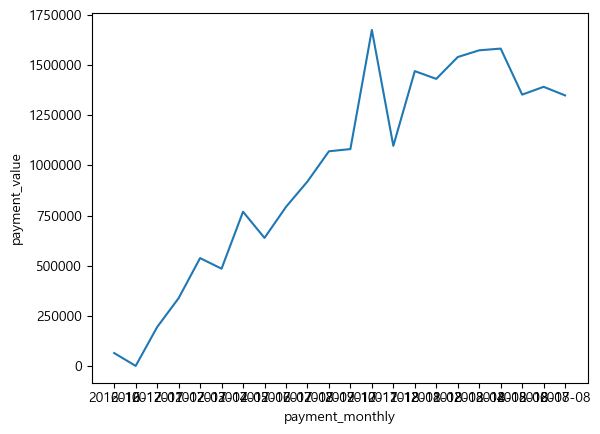

In [28]:
# day_sum 기준 그래프
day_sum = pd.DataFrame(retail_df_merged.groupby('payment_monthly').payment_value.sum()).reset_index()

plt.ticklabel_format(style='plain')
sns.lineplot(data= day_sum, x=day_sum['payment_monthly'].astype(str)
             ,y= day_sum['payment_value']
              )

# 최종 데이터프레임

In [29]:
retail_df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_item_id', 'product_id', 'seller_id',
       'price', 'shipping_charges', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_state',
       'product_category_name', 'product_weight_g', 'product_volume',
       'payment_monthly', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'payment_type_wallet', 'payment_installments_category',
       'payment_monthly_sum'],
      dtype='object')

# 표준화

In [30]:
from sklearn.preprocessing import StandardScaler
sd_sc1 = StandardScaler()
retail_df_merged['shipping_charges_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['shipping_charges']])
sd_sc2 = StandardScaler()
retail_df_merged['price_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['price']])
sd_sc3 = StandardScaler()
retail_df_merged['payment_value_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['payment_value']])
sd_sc4 = StandardScaler()
retail_df_merged['product_volume_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['product_volume']])

# 빈도 인코딩
- customer_state, payment_type, 카테고리 네임

In [31]:
retail_df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_item_id', 'product_id', 'seller_id',
       'price', 'shipping_charges', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_state',
       'product_category_name', 'product_weight_g', 'product_volume',
       'payment_monthly', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'payment_type_wallet', 'payment_installments_category',
       'payment_monthly_sum', 'shipping_charges_sd_sc', 'price_sd_sc',
       'payment_value_sd_sc', 'product_volume_sd_sc'],
      dtype='object')

In [32]:
retail_df_merged['customer_state'].unique()
# 12

array(['SP', 'RJ', 'MG', 'BA', 'PI', 'RS', 'PE', 'SC', 'MT', 'AL', 'CE',
       'ES', 'DF', 'TO', 'GO', 'PA', 'RN', 'PR', 'PB', 'SE', 'MS', 'MA',
       'AM', 'AC', 'RO', 'AP', 'RR'], dtype=object)

In [33]:
# !pip install feature_engine

In [34]:
retail_df_merged['customer_state_origin'] = retail_df_merged['customer_state']

In [35]:
from feature_engine.encoding import CountFrequencyEncoder

encoder= CountFrequencyEncoder(
    encoding_method= 'count',
    variables= 'customer_state')

encoder.fit(retail_df_merged)

encoder= CountFrequencyEncoder(
    encoding_method= 'frequency',
    variables= 'customer_state')

encoder.fit(retail_df_merged)

encoder.encoder_dict_


{'customer_state': {'SP': 0.4238063831156296,
  'RJ': 0.12956051734122642,
  'MG': 0.11614439225275079,
  'RS': 0.055948780644746156,
  'PR': 0.05067241490251593,
  'SC': 0.036355446882439996,
  'BA': 0.03393443150376424,
  'DF': 0.020735473907727946,
  'GO': 0.02037352808699569,
  'ES': 0.020164403835017053,
  'PE': 0.016295605173412265,
  'CE': 0.012507238916414646,
  'MT': 0.009281899491667203,
  'PA': 0.009233640048902902,
  'MS': 0.00714239752911653,
  'MA': 0.007126311048195097,
  'PB': 0.005364841387298115,
  'RN': 0.004697252429058619,
  'PI': 0.004697252429058619,
  'AL': 0.0037320635737726014,
  'SE': 0.003329901550736761,
  'TO': 0.002799047680329451,
  'RO': 0.0026462261115758317,
  'AM': 0.0015282156875361945,
  'AC': 0.0008284537674538318,
  'AP': 0.0006997619200823628,
  'RR': 0.00039411878257512384}}

In [36]:
retail_df_merged= encoder.fit_transform(retail_df_merged)

In [37]:
retail_df_merged['payment_type'].value_counts()

payment_type
credit_card    91724
wallet         24084
voucher         6786
debit_card      1734
Name: count, dtype: int64

# 클러스터링

<Axes: xlabel='product_volume', ylabel='payment_value'>

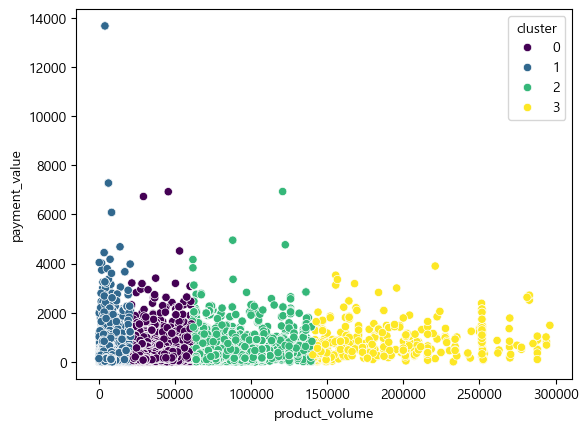

In [38]:
# K-Means Clustering
# 인코딩 한 거 아직 안 넣음!
continuous_col = ['price', 'shipping_charges', 
                  'payment_sequential', 'payment_installments', 
                  'payment_value', 'product_volume']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(retail_df_merged[continuous_col])
kmeans_test_df = retail_df_merged.copy()
kmeans_test_df['cluster'] = kmeans.labels_
sns.scatterplot(data=kmeans_test_df,
                x= 'product_volume',
                y='payment_value',
                hue='cluster',
                palette='viridis'
                )

In [39]:
# 엘보우

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def elbow(X):
    sse = [] # 군집 내 거리의 합
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

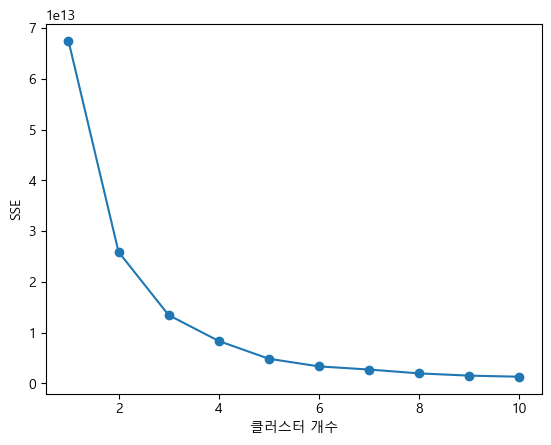

In [40]:
elbow(kmeans_test_df[continuous_col])
# 4개!!!

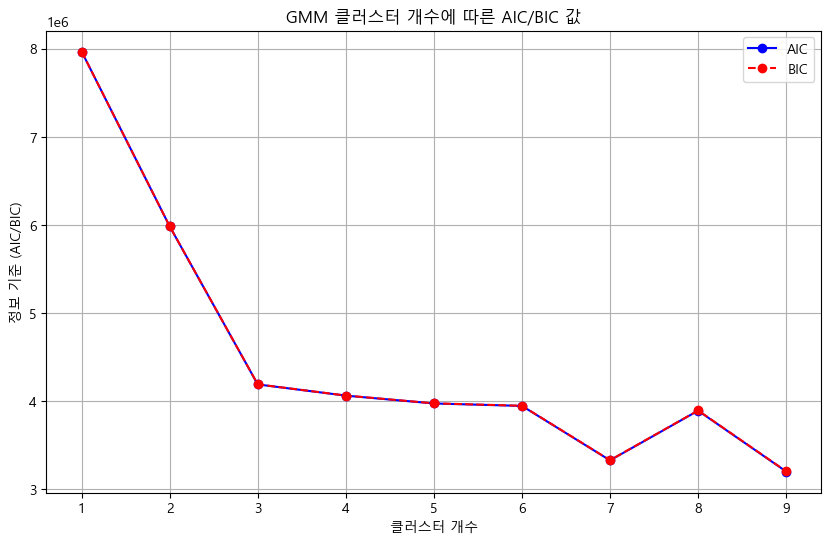

In [41]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import numpy as np
def gmm_elbow(X):
    aic = []
    bic = []
    components = range(1,10)
    for i in components:
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))
    plt.figure(figsize=(10, 6))
    plt.plot(components, aic, marker='o', linestyle='-', color='b', label='AIC')
    plt.plot(components, bic, marker='o', linestyle='--', color='r', label='BIC')
    plt.xlabel('클러스터 개수')
    plt.ylabel('정보 기준 (AIC/BIC)')
    plt.title('GMM 클러스터 개수에 따른 AIC/BIC 값')
    plt.legend()
    plt.grid(True)
    plt.show()
gmm_elbow(kmeans_test_df[continuous_col])


# 표준화

In [42]:
# 'price', 'shipping_charge', 'payment_value', 'product_volume' 표준화: 
# 이유: raw 데이터가 치우쳐져 있다. 이상치 존재.

In [43]:
from sklearn.preprocessing import StandardScaler
sd_sc1 = StandardScaler()
retail_df_merged['shipping_charges_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['shipping_charges']])
sd_sc2 = StandardScaler()
retail_df_merged['price_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['price']])
sd_sc3 = StandardScaler()
retail_df_merged['payment_value_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['payment_value']])
sd_sc4 = StandardScaler()
retail_df_merged['product_volume_sd_sc'] = sd_sc1.fit_transform(retail_df_merged[['product_volume']])

# BERT 적용 전 전처리

In [44]:
retail_df_merged['product_category_name'] = retail_df_merged['product_category_name'].replace('home_confort', 'home_comfort')
retail_df_merged['product_category_name'] = retail_df_merged['product_category_name'].replace('costruction_tools_tools', 'costruction_tools')
retail_df_merged['product_category_name'] = retail_df_merged['product_category_name'].replace('la_cuisine', 'cuisine')

In [45]:
# 카테고리명 정리 함수
def remove_suffix(item):
    return item.replace('_2', '')
retail_df_merged['product_category_name'] = retail_df_merged['product_category_name'].apply(remove_suffix)

In [46]:
# origin 남겨두기
retail_df_merged['product_category_name_origin'] = retail_df_merged['product_category_name']

In [47]:
# 언더바, and 값으로 단어들 나누는 함수 정의
def category_split(item):
    and_split = item.split('and')
    split_name = []
    for part in and_split:
        for word in part.split('_'):
            if word:  # 빈 문자열이 아닐 경우에만 추가
                split_name.append(word.strip())  # 공백 제거 후 추가
    return split_name

retail_df_merged['product_category_name']= retail_df_merged['product_category_name'].apply(category_split)

In [48]:
category_list= {"home_living": home_living, "fashion_accessories": fashion_accessories, "electronics_appliances": electronics_appliances, 
                "hobbies_leisure": hobbies_leisure, "baby_kids": baby_kids, "office_industry": office_industry, "food_beverage": food_beverage}
# dict 타입으로 변환. 키값:home_living, 밸류: 해당 값.

def product_categorizing(product):
    for key, value in category_list.items():
        if product in value:
            return key
        
retail_df_merged["product_category_name_cf_en"] = retail_df_merged['product_category_name_origin'].apply(product_categorizing)


# 빈도수 인코딩 (product_category)

In [49]:
from feature_engine.encoding import CountFrequencyEncoder

encoder= CountFrequencyEncoder(
    encoding_method= 'count',
    variables= 'product_category_name_cf_en')
encoder.fit(retail_df_merged)

encoder= CountFrequencyEncoder(
    encoding_method= 'frequency',
    variables= 'product_category_name_cf_en')
encoder.fit(retail_df_merged)
retail_df_merged= encoder.fit_transform(retail_df_merged)

In [50]:
retail_df_merged['product_category_name_cf_en'].isna().sum()
## 흠흠흠흠흠


0